In [3]:
import pandas as pd

df1 = pd.read_excel('./dataSet/Aracaju.xlsx')
df2 = pd.read_excel('./dataSet/Fortaleza.xlsx')
df3 = pd.read_excel('./dataSet/Natal.xlsx')
df4 = pd.read_excel('./dataSet/Recife.xlsx')
df5 = pd.read_excel('./dataSet/Salvador.xlsx')

df = pd.concat([df1,df2,df3,df4,df5])


In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
df['Cidade'].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [12]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
97,Recife,2019-01-01,153.04,983,4
44,Fortaleza,2019-01-01,215.11,1003,1
136,Fortaleza,2019-03-02,39.09,982,4
110,Recife,2019-03-02,51.98,983,6
112,Natal,2019-01-02,43.00,1036,3
54,Salvador,2019-01-01,46.54,1037,3
129,Salvador,2019-03-02,125.66,1037,1
127,Natal,2019-01-02,240.61,1035,3
2,Fortaleza,2019-02-10,35.33,1004,3
110,Fortaleza,2019-03-02,51.98,983,6


In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [17]:
df['LojaID'] = df['LojaID'].astype('object')

In [18]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [26]:
# Returns the sum of the null valuesof the columns
df.isnull().sum()

Cidade    0
Data      0
Vendas    7
LojaID    0
Qtde      0
dtype: int64

In [31]:
df['Vendas'].fillna(0, inplace=True)

In [33]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Delete rows with null values
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
# Delete blank lines
df.dropna(how='all', inplace=True)

## Create a new columns

In [4]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [39]:
del df['Receitas']

In [40]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [5]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas'] 

In [42]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [43]:
df['Receita'].max()

3544.0

In [44]:
df['Receita'].min()

0.0

In [46]:
df.nlargest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [6]:
df.nsmallest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [7]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37206.37
Natal        167227.52
Recife        51936.51
Salvador      40143.31
Name: Receita, dtype: float64

In [8]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
10,Natal,2018-10-27,828.0,852,4,3312.0
38,Natal,2018-02-25,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Manipulating dates

In [13]:
df['Data'] = df['Data'].astype('int64')

In [14]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [15]:
df['Data'] = pd.to_datetime(df['Data'])

In [16]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [17]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    227085.43
Name: Receita, dtype: float64

In [6]:
df['Ano_Venda'] = df['Data'].dt.year

In [22]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
103,Aracaju,2018-01-01,12.62,1522,3,37.86,2018
14,Aracaju,2018-01-01,148.21,1521,3,444.63,2018
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,2019
106,Natal,2019-01-02,149.19,1035,2,298.38,2019
53,Natal,2019-02-14,290.00,854,4,1160.00,2019


In [7]:
df['Mes_Venda'], df['Dia_Venda'] = df['Data'].dt.month, df['Data'].dt.day

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
168,Salvador,2019-01-02,20.22,1036,1,20.22,2019,1,2
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,2019,2,12
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019,1,1
93,Natal,2019-01-02,15.58,1037,1,15.58,2019,1,2
25,Recife,2019-01-01,161.60,982,5,808.00,2019,1,1


In [25]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [26]:
df['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [8]:
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
42,Salvador,2019-01-01,44.28,1034,1,44.28,2019,1,1,365 days
193,Salvador,2019-01-02,3.97,1036,2,7.94,2019,1,2,366 days
224,Salvador,2019-01-02,178.30,1035,3,534.90,2019,1,2,366 days
43,Aracaju,2018-01-01,19.63,1523,9,176.67,2018,1,1,0 days
36,Recife,2019-01-01,146.62,983,6,879.72,2019,1,1,365 days


In [9]:
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
229,Natal,2019-01-02,43.08,1036,2,86.16,2019,1,2,366 days,1
89,Natal,2019-01-02,17.46,1034,1,17.46,2019,1,2,366 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
96,Natal,2019-01-02,42.94,1034,3,128.82,2019,1,2,366 days,1
23,Salvador,2019-01-01,193.20,1036,3,579.60,2019,1,1,365 days,1


In [44]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [48]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
46,Natal,2019-03-26,753.00,853,2,1506.00,2019,3,26,449 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,2019,3,8,431 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1


## Data visualization

In [9]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

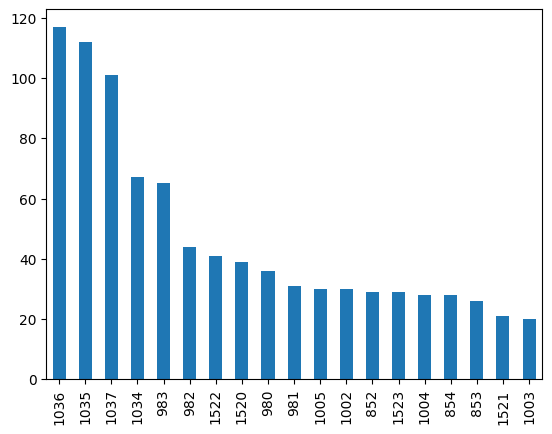

In [12]:
df['LojaID'].value_counts(ascending=False).plot.bar()

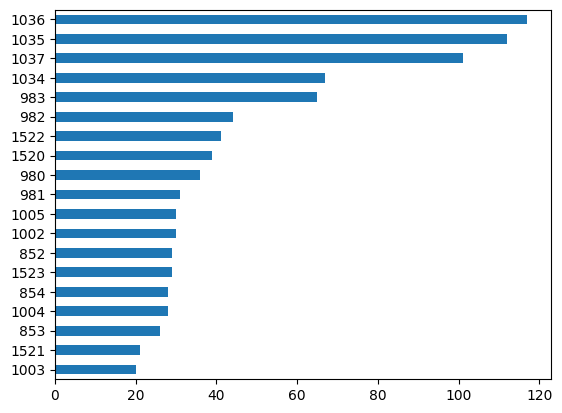

In [15]:
df['LojaID'].value_counts(ascending=True).plot.barh()

<AxesSubplot: ylabel='Receita'>

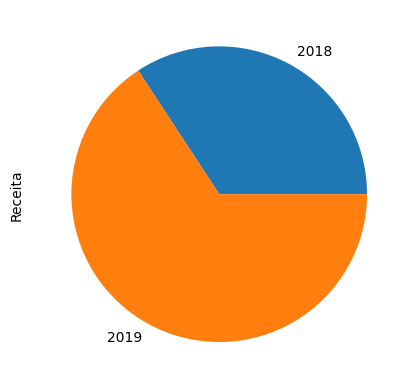

In [19]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [21]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

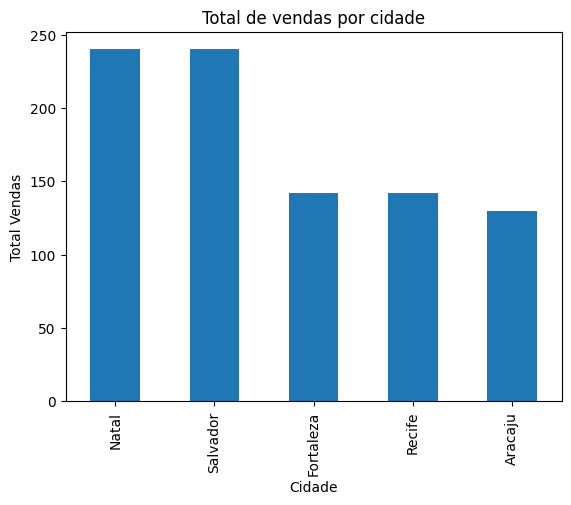

In [10]:
import matplotlib.pyplot as plt

df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

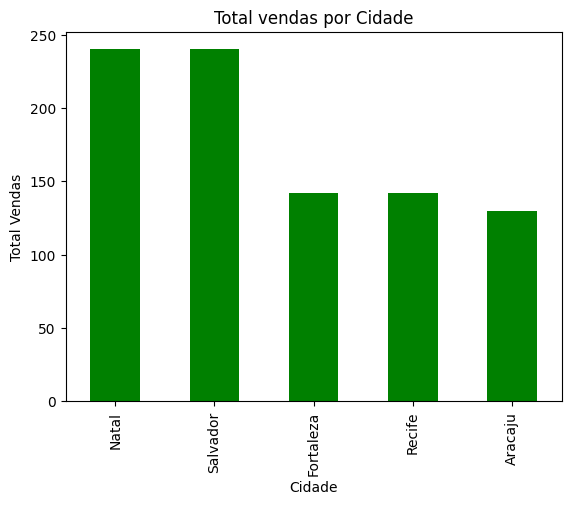

In [23]:
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [24]:
plt.style.use('ggplot')

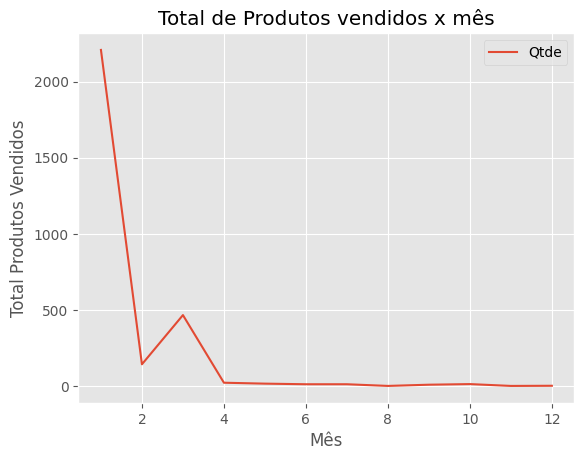

In [33]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total de Produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

In [35]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

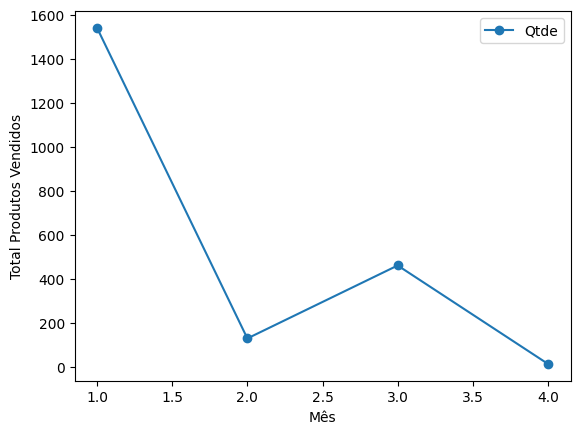

In [12]:
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum()

df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

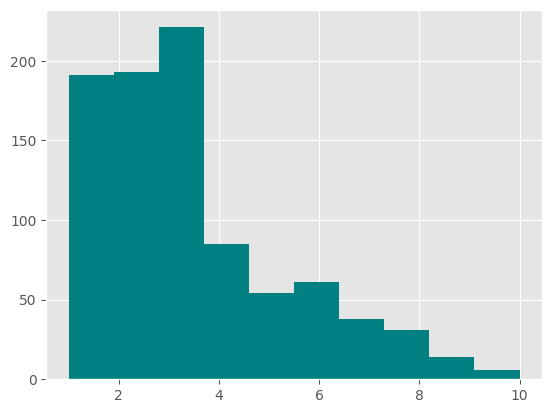

In [45]:
plt.hist(df['Qtde'], color='teal')

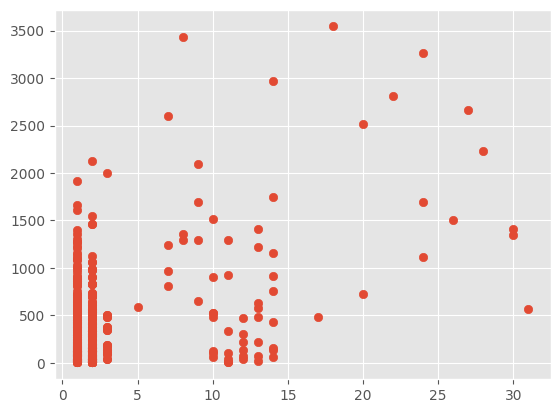

In [47]:
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita'])

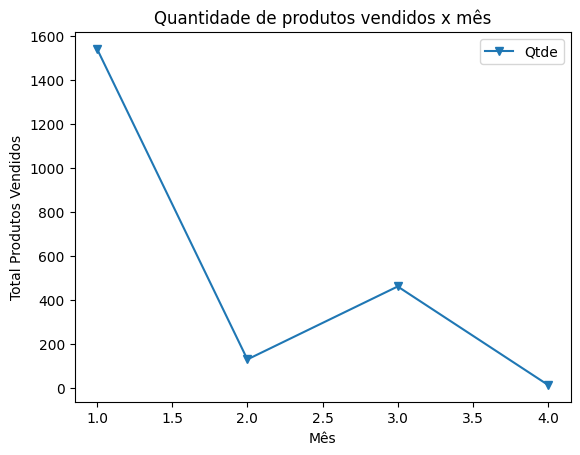

In [14]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('./downloads/Grafico QTDE x MES.png')